Importing libraries

In [3]:
import cv2
import numpy as np
from skimage import exposure
import random
import matplotlib.pyplot as plt

Histogram Matching

<ipython-input-4-a220249e576d>:13: FutureWarning: `multichannel` is a deprecated argument name for `match_histograms`. It will be removed in version 1.0. Please use `channel_axis` instead.
  matched = exposure.match_histograms (src, ref, multichannel=multi)


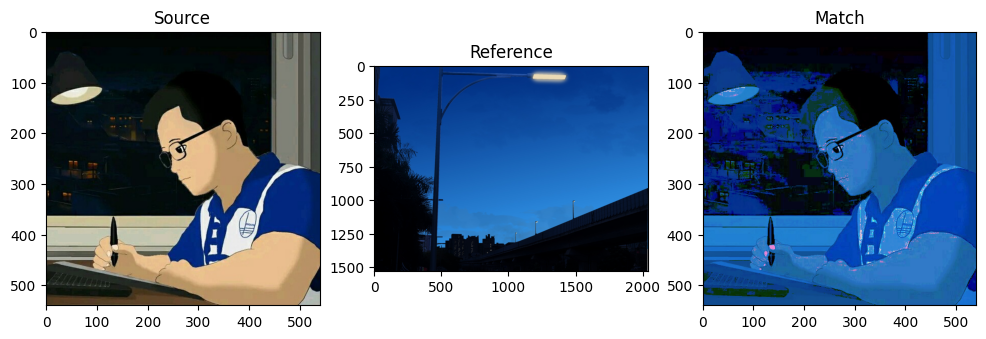

In [4]:
src = cv2.imread("image.png")
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (12,12))
plt.subplot(1,3,1)
plt.title("Source")
plt.imshow(src)
ref = cv2.imread("image1.png")
ref = cv2.cvtColor(ref, cv2.COLOR_BGR2RGB)
plt.subplot(1,3,2)
plt.title("Reference")
plt.imshow(ref)
multi = True if src.shape[-1]> 1 else False
matched = exposure.match_histograms (src, ref, multichannel=multi)
plt.subplot(1,3,3)
plt.title("Match")
plt.imshow(matched)

In [5]:
img = cv2.imread("wood.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

BLUR

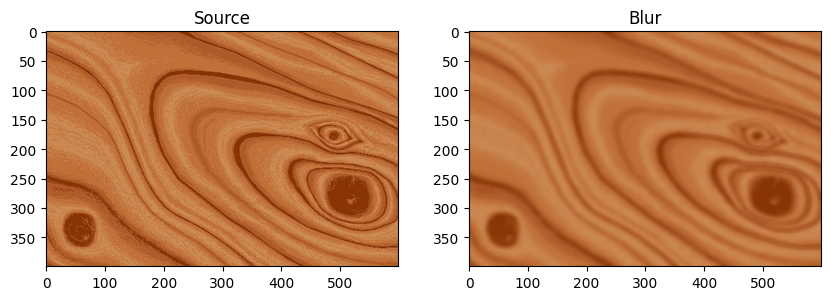

In [6]:
img_blur = cv2.blur(img,(10,10))
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.title("Source")
plt.imshow(img)
plt.subplot(1,2,2)
plt.title("Blur")
plt.imshow(img_blur)

GAUSSIAN_BLUR

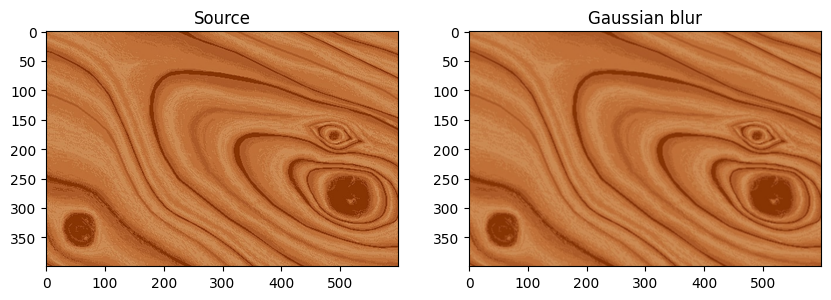

In [7]:
img_gau = cv2.GaussianBlur(img,(3,3),0)
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.title("Source")
plt.imshow(img)
plt.subplot(1,2,2)
plt.title("Gaussian blur")
plt.imshow(img_gau)

MEDIAN_BLUR

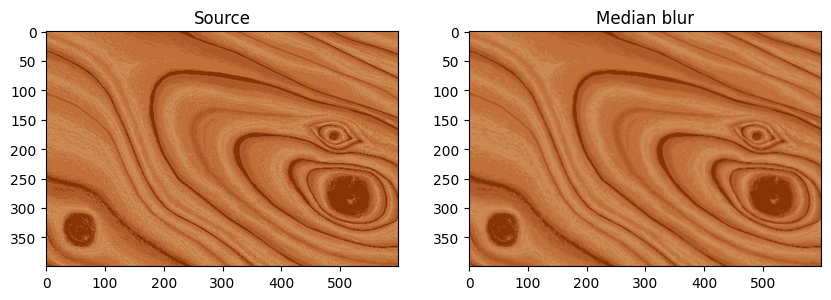

In [8]:
img_median = cv2.medianBlur(img,3)
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.title("Source")
plt.imshow(img)
plt.subplot(1,2,2)
plt.title("Median blur")
plt.imshow(img_median)

BILATERAL_BLUR

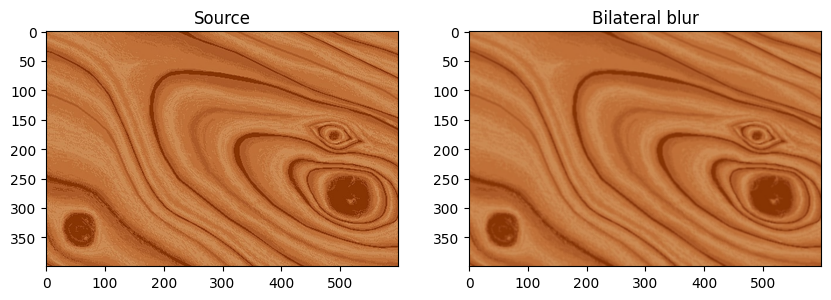

In [9]:
img_bila = cv2.bilateralFilter(img,5,180,180)
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.title("Source")
plt.imshow(img)
plt.subplot(1,2,2)
plt.title("Bilateral blur")
plt.imshow(img_bila)

Read Image, create filter

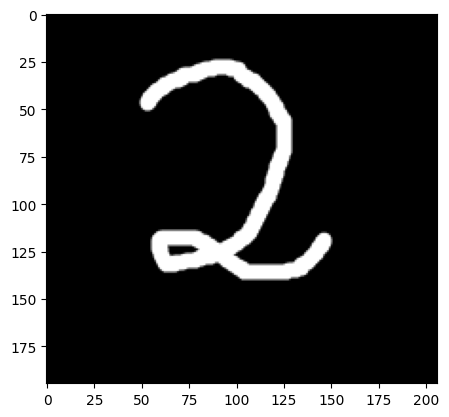

In [10]:
img = cv2.imread('number.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.figure(figsize = (10, 10))
plt.imshow(img_gray, cmap = 'gray')

In [11]:
kernel = np.ones((5,5),np.uint8)
print(kernel)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


Dilate Image:

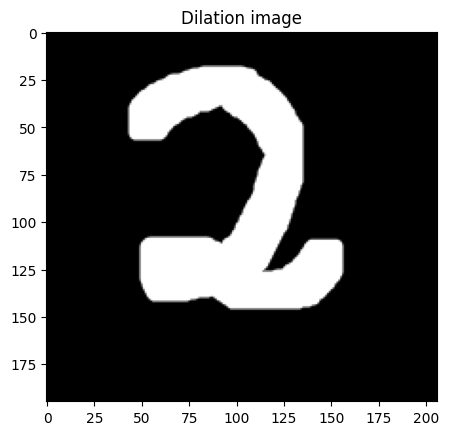

In [12]:
dilation = cv2.dilate (img_gray, kernel, iterations = 3)
plt.title("Dilation image")
plt.imshow(dilation, cmap = 'gray')

Erosion Image:

(195, 206)


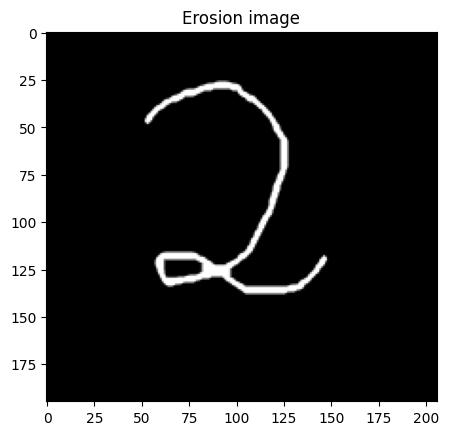

In [13]:
erosion = cv2.erode (img_gray, kernel, iterations = 1)
print (erosion.shape)
plt.title("Erosion image")
plt.imshow(erosion, cmap = 'gray')

Opening : erosion followed by dilation

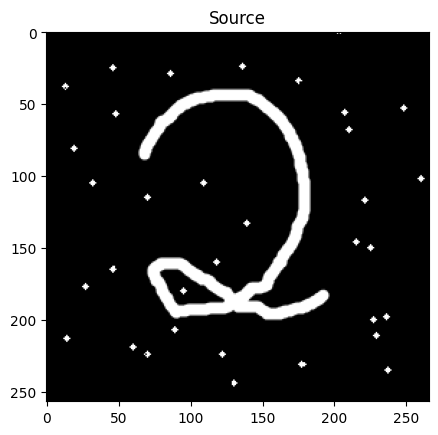

In [14]:
img = cv2.imread('erosion.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.title("Source")
plt.imshow(img_gray, cmap = 'gray')

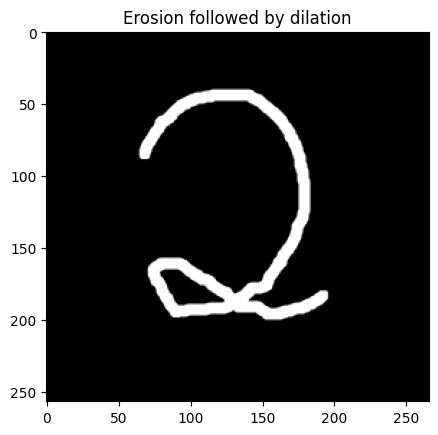

In [15]:
opening = cv2.morphologyEx(img_gray, cv2.MORPH_OPEN, kernel)
plt.title("Erosion followed by dilation")
plt.imshow(opening, cmap = 'gray')

Opening : dilation followed by erosion

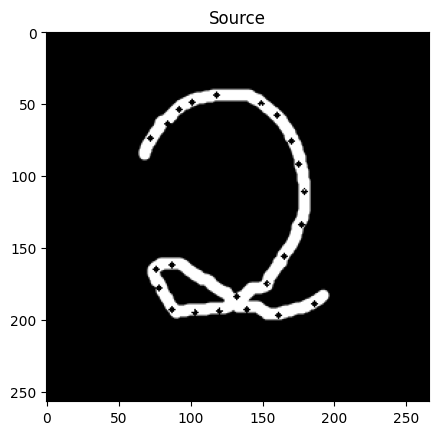

In [16]:
img = cv2.imread('dilation.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.title("Source")
plt.imshow(img_gray, cmap = 'gray')

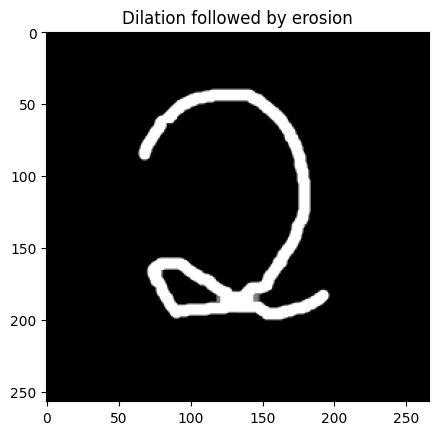

In [17]:
closing = cv2.morphologyEx(img_gray, cv2.MORPH_CLOSE, kernel)
plt.title("Dilation followed by erosion")
plt.imshow(closing, cmap = 'gray')

IMAGE GRADIENT:

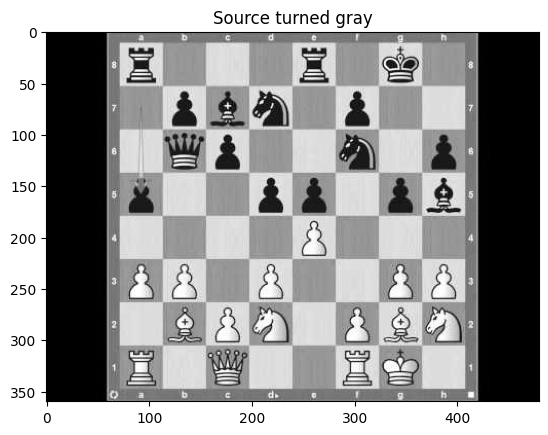

In [18]:
img = cv2.imread('chest.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.title("Source turned gray")
plt.imshow(img_gray, cmap = 'gray')

IMAGE GRADIENT: sobel x

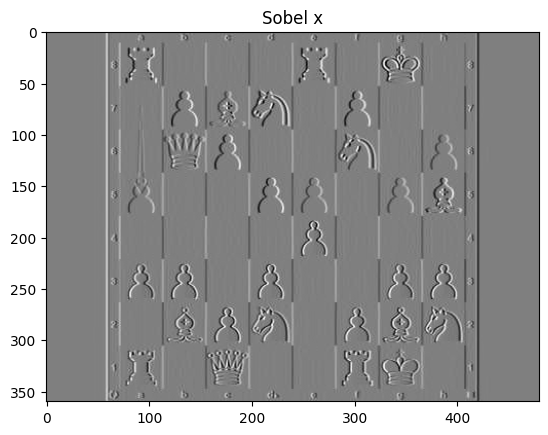

In [19]:
# sobel x
sobelx = cv2.Sobel (img_gray, cv2.CV_64F, 1, 0, ksize=1)
plt.title("Sobel x")
plt.imshow(sobelx, cmap = 'gray')

IMAGE GRADIENT: sobel y

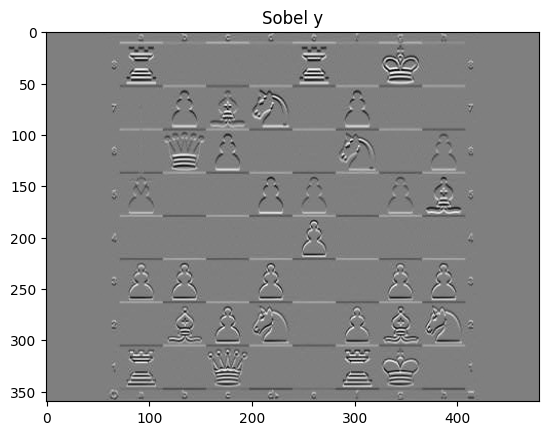

In [20]:
# sobel y
sobely = cv2.Sobel (img_gray, cv2.CV_64F, 0, 1, ksize=1)
plt.title("Sobel y")
plt.imshow(sobely, cmap = 'gray')

IMAGE GRADIENT: addWeight sobel_x & sobel_y

(360, 480)


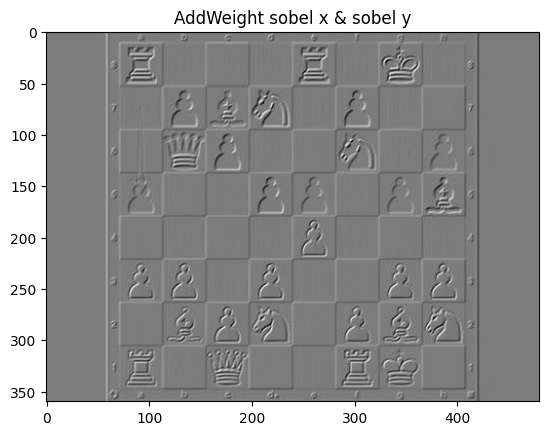

In [21]:
# cộng logic 2 ảnh sobel 2 trục với tỷ lệ 50:50
dst = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0.0)
plt.title("AddWeight sobel x & sobel y")
plt.imshow(dst, cmap ='gray')
print(dst.shape)

IMAGE GRADIENT: Laplacian

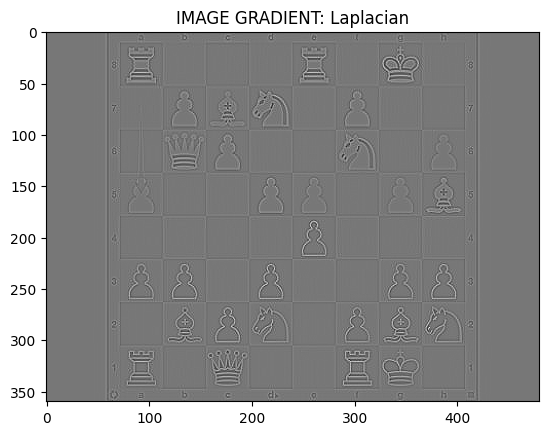

In [22]:
# laplacian
laplacian = cv2.Laplacian (img_gray, cv2.CV_64F)
plt.title("IMAGE GRADIENT: Laplacian")
plt.imshow(laplacian, cmap = 'gray')

Sharpen Images:

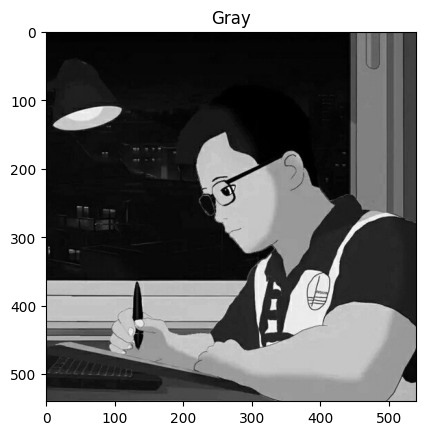

In [23]:
img = cv2.imread("image.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.title("Gray")
plt.imshow(img_gray, cmap='gray')

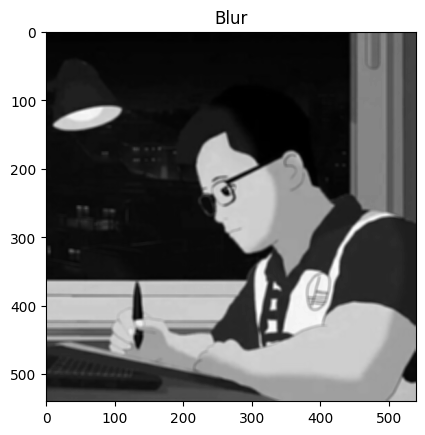

In [24]:
# Tạo ảnh blur
img_blur = cv2.blur(img_gray,(5,5))
plt.title("Blur")
plt.imshow(img_blur, cmap='gray')

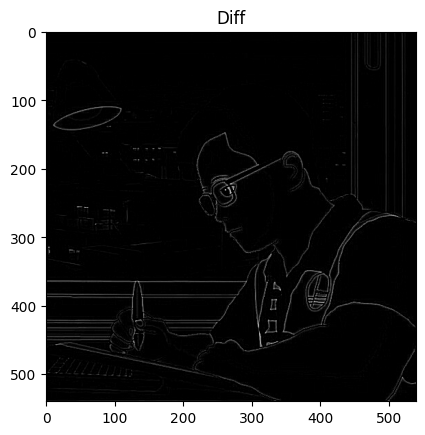

In [25]:
# Trừ logic ảnh gray và ảnh blur
diff = cv2.subtract(img_gray, img_blur)
plt.title("Diff")
plt.imshow(diff, cmap='gray')

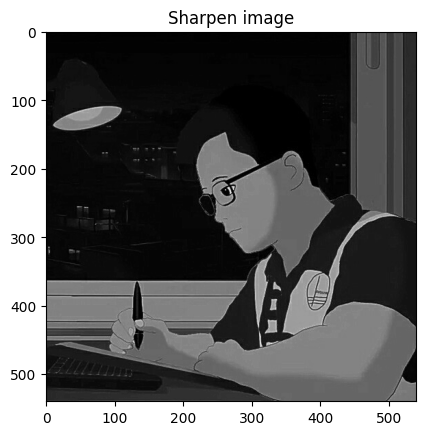

In [26]:
# Xuất ảnh cuối cùng bằng cách cộng logic giữa ảnh gray và ảnh trừ với tỷ lệ 50:50
final = cv2.addWeighted(img_gray, 0.5, diff, 0.5, 0.0)
plt.title("Sharpen image")
plt.imshow(final, cmap = 'gray')

Rotate Images:

In [27]:
img = cv2.imread('signature.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

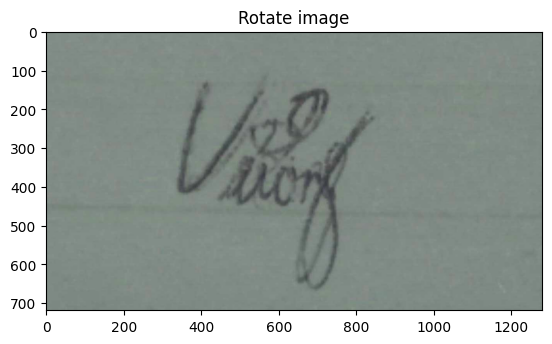

In [28]:
# Lấy kích thước của bức hình (h, w)
(h, w) = img.shape[:2]

# Tính toán tọa độ của điểm trung tâm (cX, cY) của bức hình
# bằng cách chia kích thước của bức hình cho 2
(cX, cY) = (w // 2, h // 2)

# Tạo ma trận biến đổi xoay (M) với tâm xoay là (cX, cY) và góc xoay ngẫu nhiên trong khoảng -5 đến 5 độ
M = cv2.getRotationMatrix2D((cX, cY), random.randint(-5, 5), 1.0)

# Áp dụng ma trận biến đổi (M) để xoay bức hình (img)
rotated = cv2.warpAffine(img, M, (w, h))

# Hiển thị bức hình sau khi đã xoay
plt.title("Rotate image")
plt.imshow(rotated)

Flip Images:

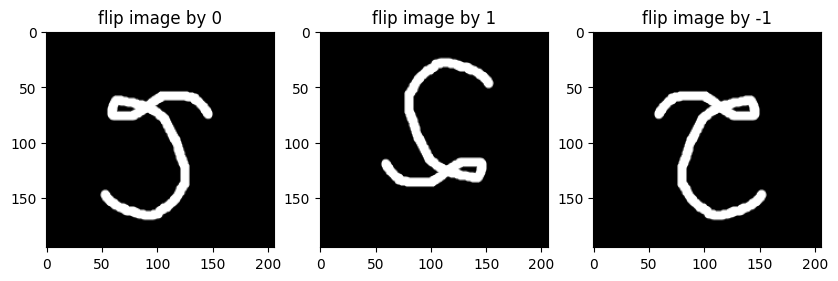

In [29]:
img = cv2.imread('number.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
i=1
indice = [0,1,-1]
plt.figure(figsize = (10,10))
for index in indice:
  a = cv2.flip(img,index)
  plt.subplot(1,3,i)
  plt.title(f'flip image by {indice[i-1]}')
  plt.imshow(a)
  i+=1

Bonus: Chụp một bức hình có ghi tên lên trang giấy có dòng kẻ ngang. Tạo một filter của riêng mình và sử dụng cv2.filter2D để loại bỏ dòng kẻ (chỉ giữ lại chữ viết trên giấy)

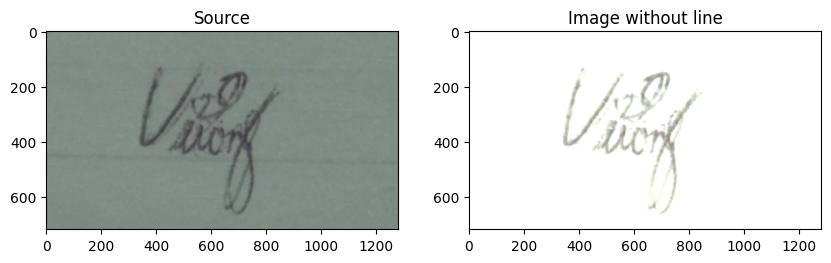

In [61]:
# Đọc ảnh từ file
image = cv2.imread('signature.png')

# Chuyển ảnh sang ảnh grayscale
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Tạo một filter (kernel) để xác định dòng kẻ ngang
kernel = np.array([[0, -0.4, 0],
                   [1, 1, 1],
                   [0, -0.4, 0]])

# Áp dụng filter lên ảnh để loại bỏ dòng kẻ
filtered_image = cv2.filter2D(rgb, -1, kernel)

# Hiển thị ảnh gốc và ảnh đã xử lý
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.title("Source")
plt.imshow(image)
plt.subplot(1,2,2)
plt.title("Image without line")
plt.imshow(filtered_image)